In [2]:
import sys
import heapq
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze
INF = float('inf')

## Dijkstra

In [16]:
def dijkstra(maze, source, destination):
    """
    inputs:
        start_position:
            tuple of x, y position of starting node 
        maze:
            Maze object
    """
    x, y = source
    
    distance = []
    parent = []
    priority_q = []
    vis = []
    path = []
    
    for _ in range(maze.num_rows):
        distance.append([INF for i in range(maze.num_columns)])
        parent.append(list(bytearray(maze.num_columns)))
        vis.append(list(bytearray(maze.num_columns)))
        
    distance[x][y] = 0
    
    for i in range(maze.num_rows):
        for j in range(maze.num_columns):
            heapq.heappush(priority_q, (distance[i][j], (i,j)))
    
    while(len(priority_q)):
        current = heapq.heappop(priority_q)
        x, y = current[1]
        vis[x][y] = 1

        if((x,y) == destination):
            out = [(x,y)]
            if(distance[x][y] == INF):
                return []
            while(parent[x][y] != 0):
                x, y = parent[x][y]
                out.append((x,y))
            return out[::-1]

        path.append((x,y))

        if(x > 0):
            if(maze.grid[x][y].neighbors["N"] != INF and vis[x-1][y] == 0):
                if(distance[x-1][y] > distance[x][y]+maze.grid[x][y].neighbors["N"]):
                    distance[x-1][y] = distance[x][y]+maze.grid[x][y].neighbors["N"]
                    parent[x-1][y] = (x,y)
        if(x < maze.num_rows-1):
            if(maze.grid[x][y].neighbors["S"] != INF and vis[x+1][y] == 0):
                if(distance[x+1][y] > distance[x][y]+maze.grid[x][y].neighbors["S"]):
                    distance[x+1][y] = distance[x][y]+maze.grid[x][y].neighbors["S"]
                    parent[x+1][y] = (x,y)
        if(y < maze.num_columns-1):
            if(maze.grid[x][y].neighbors["E"] != INF and vis[x][y+1] == 0):
                if(distance[x][y+1] > distance[x][y]+maze.grid[x][y].neighbors["E"]):
                    distance[x][y+1] = distance[x][y]+maze.grid[x][y].neighbors["E"]
                    parent[x][y+1] = (x,y)
        if(y > 0):
            if(maze.grid[x][y].neighbors["W"] != INF and vis[x][y-1] == 0):
                if(distance[x][y-1] > distance[x][y]+maze.grid[x][y].neighbors["W"]):
                    distance[x][y-1] = distance[x][y]+maze.grid[x][y].neighbors["W"]
                    parent[x][y-1] = (x,y)
        
        temp = [(lambda: heapq.heappop(priority_q))() for i in range(len(priority_q))]
        for i in temp:
            x, y = i[1][0], i[1][1]
            heapq.heappush(priority_q, (distance[x][y], (x, y)))
    
    return []

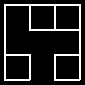

In [17]:
maze = Maze(3,3)
maze.add_path((0,0), "S", 0)
maze.add_path((0,1), "E", 0)
maze.add_path((1,1), "S", 0)
maze.add_path((1,1), "E", 0)
maze.add_path((1,2), "S", 0)
display(maze.draw(cell_width = 25))

In [18]:
dijkstra(maze, (0,0), (2,0))

[]